In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#Fetching the dataset 
def fetch():
    train_set = pd.read_csv(r'C:\Users\Jagat\Desktop\ML(DATASETS)\mnist_train.csv').to_numpy()
    test_set  = pd.read_csv(r'C:\Users\Jagat\Desktop\ML(DATASETS)\mnist_test.csv').to_numpy()
    return train_set , test_set
train , test = fetch()


In [3]:
# Splitting into lablel and data 
x_train = train[0:59000,1:]
y_train = train[0:59000,0]
x_test = test[0:9999,1:]
y_test = test[0:9999,0]



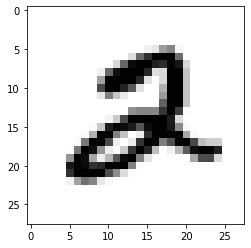

In [4]:
# Looking at the data(pixel_zixe=28*28)
import matplotlib as mpl 
import matplotlib.pyplot as plt 
digit = x_train[5]
image = np.reshape(digit,(28,28))
plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")

In [5]:
# Using K-Neighbor Classsifier as our traning model , and training it using train dataset 
from sklearn.neighbors import KNeighborsClassifier 
K_neigh = KNeighborsClassifier(n_neighbors=1)
K_neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
# Testing the model on test dataset 
y_predicted = K_neigh.predict(x_test) 


In [39]:
# Calculating Precision and Recall and F1 score for every Number(0-9) Predicted by Our Classifier  
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predicted,labels=[0,1,2,3,4,5,6,7,8,9])) # For every label 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       957
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.97      0.97      0.97      9999



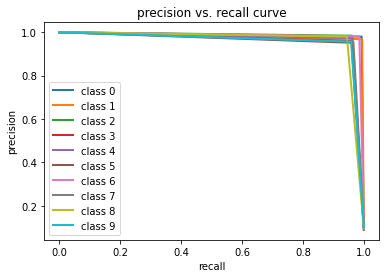

In [41]:
# Now to Plot Precison-Recall Curve for Multilablel Classifiaction Task in hand 
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize 
y_test_label = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
y_predicted_label = label_binarize(y_predicted, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y_test_label.shape[1]

precision = dict()
recall = dict()
for i in range(10):
     precision[i], recall[i], _ = precision_recall_curve(y_test_label[:,i],
                                                        y_predicted_label[:,i])
     plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()
